In [1]:
# linear algebra lybrary
import numpy as np 

In [2]:
# data processing lybrary
import pandas as pd 

In [51]:
# data visualization lybrary
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

In [4]:
# Algorithms scikit-learn lybrary
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [4]:
# Getting data
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [5]:
# Data Exploration/Analysis
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Checking train data set
print(train_df.to_string())

     PassengerId  Survived  Pclass                                                                                Name     Sex    Age  SibSp  Parch              Ticket      Fare            Cabin Embarked
0              1         0       3                                                             Braund, Mr. Owen Harris    male  22.00      1      0           A/5 21171    7.2500              NaN        S
1              2         1       1                                 Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.00      1      0            PC 17599   71.2833              C85        C
2              3         1       3                                                              Heikkinen, Miss. Laina  female  26.00      0      0    STON/O2. 3101282    7.9250              NaN        S
3              4         1       1                                        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00      1      0              113803   53.1000       

Coloumn Description<br>
PassengerId :   Unique ID of a passenger.<br>
Survived    :   1 = passenger survived the disaster, 0 = didn't survived.<br>
Pclass      :   Ticket class. (int64)<br>
Age         :   Age in years. (float64)<br>
Sex         :   Sex in male and female.<br>
SibSp       :   # of siblings / spouses aboard the Titanic.<br>
Parch       :   # of parents / children aboard the Titanic.<br>
Ticket      :   Ticket number.<br>
Fare        :   Pasenger fare. (float64)<br>
Cabin       :   Cabin Number.<br>
Embark      :   Embarkation port.

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
# percentage of survived passenger
len(train_df[train_df['Survived']==1])/len(train_df)*100

# the value of the calculation before is equals to Survived's means
# we can see that the range of passenger's age from 0.42 years old (min) to 80 years old (max) 
# from the count we can see which colloumn that contains missing value (age)

38.38383838383838

In [20]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


From the table above, we can note a few things. First of all, that we need to convert a lot of features into numeric ones later on, so that the machine learning algorithms can process them. Furthermore, we can see that the features have widely different ranges, that we will need to convert into roughly the same scale. We can also spot some more features, that contain missing values (NaN = not a number), that we need to deal with.

In [47]:
missing = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = round(train_df.isnull().sum().sort_values(ascending=False)/train_df.isnull().count()*100,1).sort_values(ascending=False)
missing_data = pd.concat([missing, percent_1], axis=1, keys=['Missing', '%'])
missing_data.head(len(train_df.axes[1]))

,Missing,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


The Embarked feature has only 2 missing values, which can easily be filled. It will be much more tricky, to deal with the ‘Age’ feature, which has 177 missing values. The ‘Cabin’ feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 77 % of it are missing.

In [49]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

From the array of coloumn<br>
We can see which coloumn that doesn't contribute to survival rate (Passenger_Id, Name, Ticket)

/var/folders/tm/_5b8ncvs17q86cc2l7plfl9h0000gn/T/ipykernel_11125/3519229162.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
/var/folders/tm/_5b8ncvs17q86cc2l7plfl9h0000gn/T/ipykernel_11125/3519229162.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.c

Text(0.5, 1.0, 'Male')

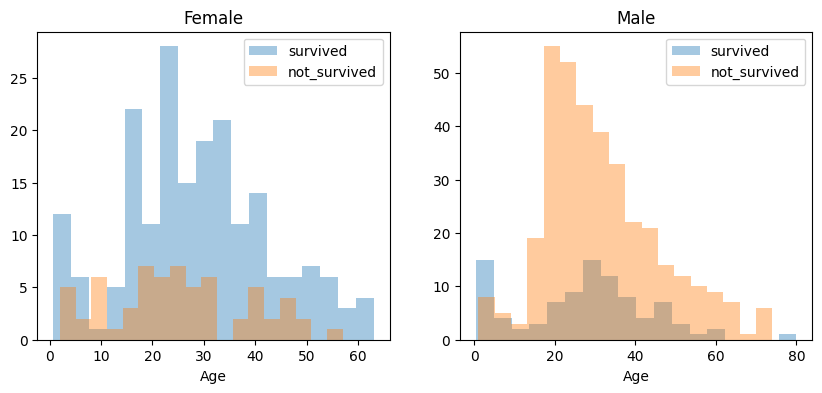

In [106]:
survived = 'survived'
not_survived = 'not_survived'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

women = train_df[train_df['Sex']=='female']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=18, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')

men  = train_df[train_df['Sex']=='male']
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label= survived, ax = axes[1], kde=False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=18, label= not_survived, ax = axes[1], kde=False)
ax.legend()
ax.set_title('Male')

From the pictures of distribution before<br>
Female have higher survival probability than Male, especialy from 14 to 40 years old.<br>
In the range of 20 to 38 years old, male have high probability of survival probability.<br>
Also infant have high survival probability for both gender.

/Users/user/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/user/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/user/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/user/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

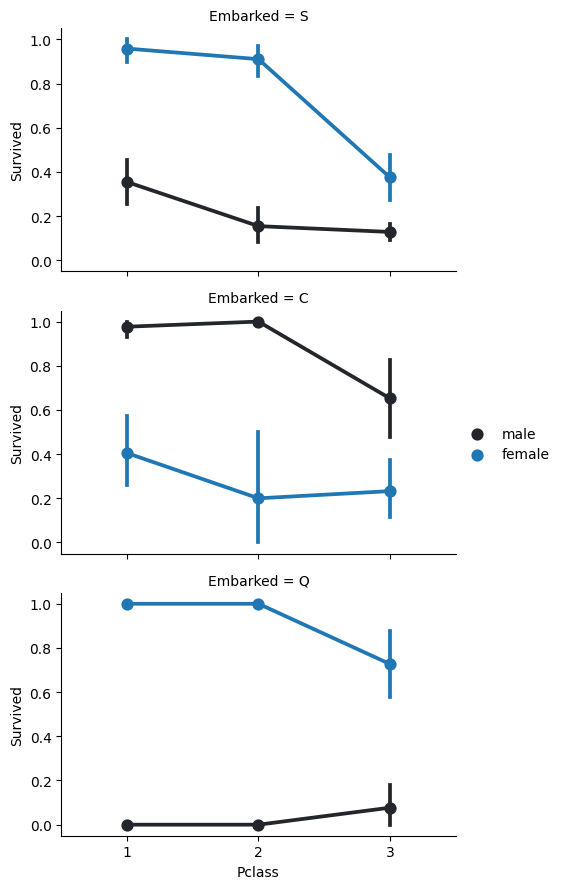

In [108]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()